### Data mining techniques, assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### cleaning

import pandas as pd
import numpy as np
import re


##############################
# functions to clean up dataset
##############################

def clean_up(programs, swapper):
    """
    Cleans up program by converting all programs to its abbreviations
    """

    # Loop over keys
    for key in swapper.keys():

        r = re.compile(".*" + str(key) + ".*", re.IGNORECASE)
        newlist = list(filter(r.match, programs))
        programs = np.asarray([swapper[key] if x in newlist else x for x in programs])

    return programs


def program(prog):
    """
    Cleans up program
    :param prog:
    :return:
    """
    swapper = {"Artificial Intelligence": "Beta",
               "AI": "Beta",
               "Business Analytics": "Business",
               "Computer science": "Beta",
               "QRM": "Business",
               "Quantitative risk management": "Business",
               "Econometrics": "Business",
               "Business Administration": "Business",
               "Bioinformatics": "Beta",
               "Computational Science": "Beta",
               "Digital business": "Beta",
               "Information Science": "Beta",
               "Information studies": "Beta",
               "Human language": "Other",
               "Human movement": "Other",
               "Datascience": "Beta",
               "Health sciences": "Other",
               "Fintech": "Business",
               "Erasmus": "Other",
               "Computing system": "Beta",
               "Finance": "Business",
               "Scientific computing": "Beta",
               "Big data engineering": "Beta",
               "EOR": "Business",
               "Exchange": "Other",
               "Physics": "Beta",
               "CPS": "Other",
               "CLS": "Other",
               "Computer systems": "Beta",
               "Forensic science": "Other",
               "MSc": "Other",
               "BA": "Business",
               "CS": "Beta"}

    # swap all studies to one standard notation
    prog = clean_up(prog, swapper)
    # prog = np.asarray(['other' if x not in swapper.values() else x for x in prog])

    return prog


def birthday(dates):
    """
    Cleans up birthday
    :param dates:
    :return:
    """
    # create dictionary
    birth_swap = {str(x) : 2020-x for x in range(1970,2001)}
    birth_swap.update({'-'+str(x) : 120-x for x in range(70, 99)})
    birth_swap.update({'/' + str(x) : 120-x for x in range(70, 99)})

    birth = clean_up(np.asarray(dates), birth_swap)
    birth_pd = np.asarray(pd.to_numeric(pd.Series(birth), errors='coerce')).astype(int)
    birth_pd = pd.Series([np.NaN if (x < 0 or x > 100) else x for x in birth_pd])
    birth_pd.fillna(birth_pd.mean(), inplace=True)

    return birth_pd


def continuous(series):
    """
    Cleans up continuous data
    :param neighbors:
    :return:
    """

    serie = pd.to_numeric(series, errors='coerce')
    serie.fillna(serie.mean(), inplace=True)
    return serie


def bedtime(times):
    """
    Cleans up bedtime series
    :param bedtime:
    :return:
    """

    # Create swapper
    bed_swap = {str(x) + ':': x%12 for x in range(10, 24)}
    for x in range(9):
        bed_swap[str(x) + ':'] = x%12
        bed_swap[str(x) + 'pm'] = x%12
        bed_swap[str(x) + 'am'] = x%12
        bed_swap[str(x) + ' pm'] = x%12
        bed_swap[str(x) + ' am'] = x%12
        bed_swap[str(x) + 'h'] = x%12
    bed_swap['10'] = 10
    bed_swap['01'] = 1
    bed_swap['22'] = 10
    bed_swap['23'] = 11
    bed_swap['24'] = 0
    bed_swap['Twelve'] = 0
    bed_swap['00'] = 0
    bed_swap['17'] = 5
    bed_swap['0,2'] = 0
    bed_swap['16'] = 4
    bed_swap['1,3'] = 1
    bed_swap['0,3'] = 0
    bed_swap['13'] = 1
    bed_swap['12'] = 0
    bed_swap['yes'] = "NA"
    bed_swap['30'] = "NA"
    bed_swap['dont know'] = "NA"
    bed_swap['nan'] = "NA"
    bed_swap['que'] = "NA"
    bed_swap['the beatles'] = "NA"
    bed_swap['troubles'] = "NA"
    bed_swap['didn'] = "NA"
    bed_swap['home'] = "NA"

    bedtimes = list(clean_up(np.asarray(times).astype(str), bed_swap))
    bedtimes[bedtimes.index('?')] = "NA"
    bedtimes = np.asarray(pd.to_numeric(pd.Series(bedtimes), errors='coerce')).astype(int)
    bedtimes = np.where(bedtimes < 0, np.NaN, bedtimes)

    return bedtimes

def good_day_1(series):
    """
    Cleans up first good day series
    :param series:
    :return:
    """

    words = {'weather': ['weather', 'sun'],
             'sport': ['sport', 'workout', 'gym', 'exercise', 'work-out', 'football', 'match', 'running', 'golf',
                       'boxing'],
             'productivity': ['productive', 'productivity', 'progress', 'work', 'busy'],
             'friends': ['friends', 'company', 'people'],
             'food': ['food', 'breakfast', 'grapefruits', 'cake', 'meals', 'chocolate'],
             'fun': ['fun', 'laugh', 'lauging'],
             'drinks': ['alcohol', 'beer', 'drinks', 'coffee'],
             'sleep': ['sleep', 'slept', 'rest']}

    swapper = dict()
    for x in list(words.items()):
        for y in x[1]:
            swapper[y] = x[0]

    good2 = clean_up(series, swapper)
    good2 = np.asarray(["other" if x not in words.keys() else x for x in good2])
    return good2

def good_day_2(series):
    """
    Clean second good day series
    :param series:
    :return:
    """
    words = {
        'sport': ['sport', 'jogging', 'exercise', 'football', 'basketball', 'gym', 'running', 'dancing', 'skating'],
        'productivity': ['study', 'productive', 'work', 'done', 'achiev', 'full', 'accomplish', 'progress', 'useful',
                         'schedule'],
        'socialize': ['friends', 'family', 'people', 'social', 'company'],
        'weather': ['sun', 'rain', 'warm', 'temperature', 'sky', 'weather', 'temp', 'wheather'],
        'food': ['food', 'dinner', 'sugar', 'breakfast', 'pie', 'cooking', 'eat', 'chocolate', 'ice', 'snack'],
        'music': ['song', 'music', 'drumming'],
        'drinks': ['coffee', 'latte', 'beer'],
        'playing': ['chess', 'games', 'playing'],
        'sleep': ['sleep', 'wake'],
        'fun': ['fun', 'laugh', 'party'],
        'reading': ['read'],
        'outside': ['beach', 'outside']}

    swapper = dict()
    for x in list(words.items()):
        for y in x[1]:
            swapper[y] = x[0]

    good_3 = clean_up(series, swapper)
    good_3 = np.asarray(["other" if x not in words.keys() else x for x in good_3])
    return good_3

In [3]:
### Decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

class DecisionTree(object):

    def __init__(self, df, columns, label):
        """
        init with dataframe, features and label
        :param df:
        :param features:
        :param label:
        """
        self.df = df
        self.columns = columns
        self.label = label
        self.y = df[label]

        # Initialize metrics
        self.accuracys = dict()
        self.selected_features = []
        self.scores = [0]


    def run(self, feature):
        """

        :param feature:
        :return:
        """

        self.X = pd.get_dummies(self.df[feature], drop_first=True)

        # Split in training and test
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.3)

        clf = DecisionTreeClassifier()
        clf = clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        return y_test, y_pred

    def bottom_up(self):
        """

        :return:
        """

        # Loop over features
        for column in self.columns:
            y_test, y_pred = self.run(column)

            print(f"Accuracy with feature {column}:", metrics.accuracy_score(y_test, y_pred))
            self.accuracys[column] = metrics.accuracy_score(y_test, y_pred)

        # See which feature scored best
        best_feature = max(self.accuracys, key=self.accuracys.get)
        print(f"Max accuracy: {best_feature}\n")
        self.selected_features.append(best_feature)
        self.scores.append(max(self.accuracys.values()))
        self.columns.remove(self.selected_features[len(self.selected_features) - 1])
        self.accuracys.clear()

        while self.columns:
            print(f"Round {1+len(self.selected_features)}")
            print(f"Current features in model: {self.selected_features}")



            for column in self.columns:
                columns = self.selected_features + [column]
                y_test, y_pred = self.run(columns)
                print(f"Accuracy with feature {column}:", metrics.accuracy_score(y_test, y_pred))
                self.accuracys[column] = metrics.accuracy_score(y_test, y_pred)

            best_feature = max(self.accuracys, key=self.accuracys.get)
            print(f"Max accuracy: {best_feature}\n")
            self.selected_features.append(best_feature)
            self.scores.append(max(self.accuracys.values()))
            self.columns.remove(self.selected_features[len(self.selected_features) - 1])
            self.accuracys.clear()
        print(self.selected_features)
        print(f"\nMaximum accuracy: {max(self.scores)}")
        print(f"Features for max accuracy: {self.selected_features[:self.scores.index(max(self.scores))]}")


    def top_down(self):
        """

        :return:
        """

        self.columns = self.df.columns[1:]
        y_test, y_pred = self.run(self.columns)
        print(f"Accuracy with feature {self.columns}:", metrics.accuracy_score(y_test, y_pred))

In [4]:
### Plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
#from varname import varname

def plot_mean(df, xlabel, ylabel):
    """
    Plot categorical vs continuous series
    :param xlabel: categorical series (string)
    :param ylabel: continuous series (string)
    :param mean: whether you want to plot frequency (false) or mean (true)
    :return:
    """

    # Get actual attributes
    cat_array = np.asarray(getattr(df, xlabel))
    con_array = np.asarray(getattr(df, ylabel))

    cat_array = np.asarray([cat_array[x] for x in range(len(con_array)) if con_array[x] > 0])
    con_array = np.asarray([con_array[x] for x in range(len(con_array)) if con_array[x] > 0]).astype(int)
    cat_values = sorted(set(cat_array))

    counter = dict()
    # Loop over different categorical variables
    for value in cat_values:

        # Select relevant instances and get mean of continuous variable
        bool_mask = np.where(cat_array == value, 1, 0)
        con_values = con_array[bool_mask == 1]
        print(con_values)
        counter[value] = np.mean(con_values)

    # Plot it
    plt.bar(counter.keys(), counter.values())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


def con_vs_con(df, con1, con2):
    """
    Gives a scatterplot of two continuous variables
    :param con1: first continuous series
    :param con2: second continuous series
    :return:
    """

    # Get attributes
    first_array = np.asarray(getattr(df, con1))
    second_array = np.asarray(getattr(df, con2))

    # Plot them against each other
    plt.scatter(first_array, second_array)
    plt.xlabel(con1)
    plt.ylabel(con2)
    plt.show()




def plot_frequency(df, xlabel, ylabel, integer=False):
    """
    :param df: dataframe
    :param xlabel: first categorical variable
    :param ylabel: second variable
    """

    # Get attributes
    first_array = np.asarray(getattr(df, xlabel))
    second_array = np.asarray(getattr(df, ylabel))

    first_set = sorted(set(first_array))
    first_array = np.asarray([first_array[x] for x in range(len(second_array)) if second_array[x] > 0])

    if integer:
        second_array = np.asarray([second_array[x] for x in range(len(second_array)) if second_array[x] > 0]).astype(int)
    else:
        second_array = np.asarray([second_array[x] for x in range(len(second_array)) if second_array[x] > 0])
    counter = dict()

    # Loop over variables
    for var in range(len(first_set)):
        plt.subplot(1,len(first_set),var+1)
        current_var = first_set[var]

        # Extract relevant subjects and get count of every second categorical variable
        bool_mask = np.where(first_array == current_var, 1, 0)
        second_values = second_array[bool_mask == 1]
        counter[current_var] = Counter(second_values)

        # Sort values
        keys, values = list(counter[current_var].keys()), list(counter[current_var].values())
        x = list(sorted(zip(keys, values)))
        keys, values = zip(*x)

        # Plot them (many plots after each other, one for each categorical level)
        plt.bar(keys, values)
        plt.title(current_var)
        plt.xlabel(xlabel)
        plt.ylabel("Frequency")
    plt.show()

In [5]:
### Main
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
#from plotting import *
#from cleaning import *
#from decision_tree import DecisionTree
#from naive_bayes import *

desired_width=320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns',16)

    
if __name__ == "__main__":
    # Read in data
    file = "ODI-2020.csv"
    df = pd.read_csv(file, delimiter=';')

    # Change columns
    columns = ['Program', 'ML_course', 'IR_course', 'Stats_course', 'Databases_course', "Gender", "Chocolate", "Age",
               "Neighbors", "Stand", "Stress", "Euros", "Random_number", "Bedtime", "Good_day_1", "Good_day_2"]
    df.columns = columns

    # extract males and females
    male = df.loc[df['Gender'] == 'male']
    female = df.loc[df['Gender'] == 'female']

    # Clean up programs
    df.Program = program(np.asarray(df.Program))                            # categorical
    # ML Course                                                             # categorical
    # IR Course                                                             # categorical
    # Stats Course                                                          # categorical
    # Databases Course                                                      # categorical
    # Gender                                                                # categorical
    # Chocolate                                                             # categorical
    df.Age = birthday(df.Age)                                               # continuous
    df.Neighbors = continuous(df.Neighbors)                                 # continuous
    # Stand                                                                 # categorical
    df.Stress = continuous(df.Stress)                                       # continuous
    df.Euros = continuous(df.Euros)                                         # continuous
    df.Random_number = continuous(df.Random_number)                         # continuous
    df.Bedtime = bedtime(np.asarray(df.Bedtime))                            # continuous
    df.Good_day_1 = good_day_1(np.asarray(df.Good_day_1))                   # categorical
    df.Good_day_2 = good_day_2(np.asarray(df.Good_day_2))                   # categorical

    df.dropna(inplace=True)
    #print(df.describe(include='all'))

    #plot_frequency(df, "Program", "Age")
    
    #label = "Program"
    #features = list(df.columns)
    #features.remove(label)
    #cls = DecisionTree(df, features, label)
    #cls.bottom_up()

    # separated = separate_by_class(df, "Age")
    # print(calc_prob(26, df.Age))

### Handling categorical data - pre processing
https://www.datacamp.com/community/tutorials/categorical-data

In [78]:
data = df.copy()
# Transform data to something readable
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269 entries, 0 to 279
Data columns (total 16 columns):
Program             269 non-null object
ML_course           269 non-null object
IR_course           269 non-null object
Stats_course        269 non-null object
Databases_course    269 non-null object
Gender              269 non-null object
Chocolate           269 non-null object
Age                 269 non-null float64
Neighbors           269 non-null float64
Stand               269 non-null object
Stress              269 non-null float64
Euros               269 non-null float64
Random_number       269 non-null float64
Bedtime             269 non-null float64
Good_day_1          269 non-null object
Good_day_2          269 non-null object
dtypes: float64(6), object(10)
memory usage: 35.7+ KB


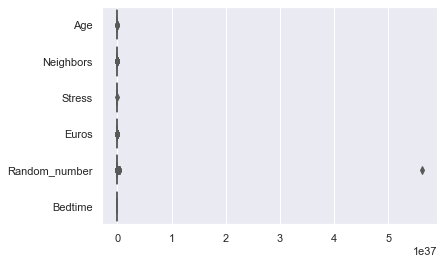

In [89]:
float_features = data.select_dtypes(include=['float64']).copy()
ax = sns.boxplot(data=float_features, orient="h", palette="Set2")
# Random number has an enormous outlier, remove this?

In [85]:
# Select categorical values
cat_features = data.select_dtypes(include=['object']).copy()
cat_features

,Program,ML_course,IR_course,Stats_course,Databases_course,Gender,Chocolate,Stand,Good_day_1,Good_day_2
0,Beta,no,unknown,mu,ja,female,fat,no,weather,sport
1,Business,no,0,mu,nee,male,unknown,no,other,drinks
2,Beta,no,0,mu,ja,female,neither,no,other,productivity
3,Business,no,0,mu,nee,female,neither,no,food,socialize
4,Business,yes,0,mu,ja,male,neither,no,weather,socialize
5,Business,yes,1,mu,ja,male,fat,no,weather,productivity
6,Business,no,0,mu,nee,female,neither,no,drinks,sport
7,Beta,no,0,mu,ja,male,I have no idea what you are talking about,no,sleep,food
8,Business,yes,0,mu,ja,female,neither,no,friends,productivity
9,Business,no,0,sigma,nee,male,fat,no,sport,sleep


In [11]:
# Check if there are any null values
print(cat_features.isnull().values.sum())
print(cat_features.isnull().sum())

0
Program             0
ML_course           0
IR_course           0
Stats_course        0
Databases_course    0
Gender              0
Chocolate           0
Stand               0
Good_day_1          0
Good_day_2          0
dtype: int64


In [12]:
# Filling null values for na
# Exaple of method chaining 
# cat_df_flights = cat_df_flights.fillna(cat_df_flights['tailnum'].value_counts().index[0])


In [13]:
# Use value_counts() to find the frequency distribution of featres within the feature
data["Good_day_1"].value_counts()

other           71
weather         66
food            34
productivity    23
friends         19
sleep           19
sport           18
drinks          11
fun              8
Name: Good_day_1, dtype: int64

In [14]:
# Or get the nuumber of distinct categories within the feature:
data["Good_day_1"].value_counts().count()

9

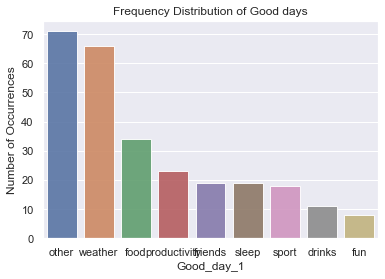

In [15]:
# Plot the frequency distribution
# more plotting tips:
# https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

day_count = data['Good_day_1'].value_counts()
sns.set(style="darkgrid")
sns.barplot(day_count.index, day_count.values, alpha=0.9)
plt.title('Frequency Distribution of Good days')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Good_day_1', fontsize=12)
plt.show()

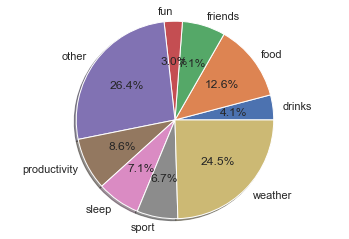

In [16]:
# Plot a pie chart
labels = data['Good_day_1'].astype('category').cat.categories.tolist()
counts = data['Good_day_1'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [17]:
data.head()

,Program,ML_course,IR_course,Stats_course,Databases_course,Gender,Chocolate,Age,Neighbors,Stand,Stress,Euros,Random_number,Bedtime,Good_day_1,Good_day_2
0,Beta,no,unknown,mu,ja,female,fat,22.000000,0.0,no,0.0,4.0,227.0,10.0,weather,sport
1,Business,no,0,mu,nee,male,unknown,24.000000,2.0,no,85.0,25.0,65.0,11.0,other,drinks
2,Beta,no,0,mu,ja,female,neither,24.724299,4.0,no,50.0,10.0,3.0,0.0,other,productivity
3,Business,no,0,mu,nee,female,neither,26.000000,0.0,no,10.0,99.0,2.0,11.0,food,socialize
4,Business,yes,0,mu,ja,male,neither,27.000000,0.0,no,60.0,80.0,7.0,10.0,weather,socialize


In [18]:
# Explore data
data["Bedtime"].value_counts()

11.0    77
0.0     73
1.0     44
2.0     24
10.0    23
3.0     10
4.0      7
8.0      3
9.0      2
7.0      2
5.0      2
6.0      2
Name: Bedtime, dtype: int64

### Encoding categorical data - (pre processing)
##### Encode the categorical features to numeric quantities
- Since you want to prevent the misinterpretation of certain categories (by giving a weighth to a category) you should make dummy variables.
- However, if you create a new column for each value of a category, there will be a high number of columns.
- This can be a problem for categories with many values!
- This can affect the interpretation of the data (curse of dimensionality).
- Therefore, a technique called binary encoding should be used for categories with many values.
- This technique encompases   one-hot (dummy variables), binary ad label encoding.


#### Create dummy variables for all columns with max 3 values
So all objects except chocolate, good day 1 and 2

In [19]:
### Also not for program since this is the response variable!!!
data_dummy = data.copy()
data_dummy = pd.get_dummies(data_dummy, columns=['ML_course', 'IR_course', 'Stats_course', 'Databases_course', 'Gender', 'Stand'], prefix = ['ML_course', 'IR_course', 'Stats_course', 'Databases_course', 'Gender', 'Stand'])

data_dummy.head()

,Program,Chocolate,Age,Neighbors,Stress,Euros,Random_number,Bedtime,...,Databases_course_nee,Databases_course_unknown,Gender_female,Gender_male,Gender_unknown,Stand_no,Stand_unknown,Stand_yes
0,Beta,fat,22.000000,0.0,0.0,4.0,227.0,10.0,...,0,0,1,0,0,1,0,0
1,Business,unknown,24.000000,2.0,85.0,25.0,65.0,11.0,...,1,0,0,1,0,1,0,0
2,Beta,neither,24.724299,4.0,50.0,10.0,3.0,0.0,...,0,0,1,0,0,1,0,0
3,Business,neither,26.000000,0.0,10.0,99.0,2.0,11.0,...,1,0,1,0,0,1,0,0
4,Business,neither,27.000000,0.0,60.0,80.0,7.0,10.0,...,0,0,0,1,0,1,0,0


#### Then, for the variables with more than 3 categories: use binary encoding

In [20]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [21]:
import category_encoders as ce

In [22]:
df_ce = data_dummy.copy()

In [23]:
encoder = ce.BinaryEncoder(cols=['Chocolate', 'Good_day_1', 'Good_day_2'])
df_binary = encoder.fit_transform(df_ce)
df_binary.head()

,Program,Chocolate_0,Chocolate_1,Chocolate_2,Chocolate_3,Age,Neighbors,Stress,...,Databases_course_nee,Databases_course_unknown,Gender_female,Gender_male,Gender_unknown,Stand_no,Stand_unknown,Stand_yes
0,Beta,0,0,0,1,22.000000,0.0,0.0,...,0,0,1,0,0,1,0,0
1,Business,0,0,1,0,24.000000,2.0,85.0,...,1,0,0,1,0,1,0,0
2,Beta,0,0,1,1,24.724299,4.0,50.0,...,0,0,1,0,0,1,0,0
3,Business,0,0,1,1,26.000000,0.0,10.0,...,1,0,1,0,0,1,0,0
4,Business,0,0,1,1,27.000000,0.0,60.0,...,0,0,0,1,0,1,0,0


### KNN classifier model
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn

In [199]:
# Set response and explanatory variables
y = "Program"
X = list(df_binary.columns)
X.remove(y)
features = df_binary[X]
target = df_binary[y]

In [200]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,  random_state=123) # 70% training and 30% test

In [201]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


In [202]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### Feature selection to improve efficiency
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [113]:
#### Only when you don't have non negative numbers...
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features,target)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Input X must be non-negative.

In [119]:
### Alternative; anova f-test
from sklearn.feature_selection import f_classif
f_classif(features, target)

/Users/ingeborgdekoe/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 10 15] are constant.
  UserWarning)
/Users/ingeborgdekoe/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


(array([       nan, 0.80597747, 0.65061018, 1.82703103, 0.90760261, 0.35669359, 0.78548401, 0.33330206, 0.31167204, 1.53917188,        nan, 1.23780282, 1.2651218 , 0.76938152, 0.43707648,        nan, 7.70516308, 3.53670222, 0.76446445, 4.43616743, 2.06410726, 0.89353697, 2.46788225, 1.57924079, 1.94413992, 7.32030268,
        1.54318611, 0.25133281, 3.73337915, 0.40310338, 1.15745316, 2.24635506, 0.56159901, 0.509055  , 0.07065119, 0.08786796, 0.49753102, 0.53867343]),
 array([           nan, 4.47738829e-01, 5.22555531e-01, 1.62903749e-01, 4.04736172e-01, 7.00321243e-01, 4.56953514e-01, 7.16852541e-01, 7.32488660e-01, 2.16463399e-01,            nan, 2.91685730e-01, 2.83897323e-01, 4.64327711e-01, 6.46385070e-01,            nan, 5.58513590e-04, 3.04857469e-02, 4.66603311e-01,
        1.27300609e-02, 1.28959870e-01, 4.10430441e-01, 8.67031380e-02, 2.08057997e-01, 1.45138392e-01, 8.03970370e-04, 2.15606123e-01, 7.77947972e-01, 2.51740749e-02, 6.68650523e-01, 3.15863306e-01, 1.07787277e-01

/Users/ingeborgdekoe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.         0.01653969 0.03455688 0.02451116 0.07264543 0.05622722 0.07201825 0.07316728 0.07599169 0.06435053 0.         0.0198943  0.03103755 0.02574882 0.02637495 0.         0.032769   0.03611448 0.037496   0.03579172 0.02298814 0.00142684 0.01253927 0.02003857 0.01901966 0.01516252 0.02021864 0.02196975 0.00881193
 0.02389798 0.02181056 0.00628721 0.03064097 0.02078073 0.00124401 0.00626916 0.00759048 0.00406865]


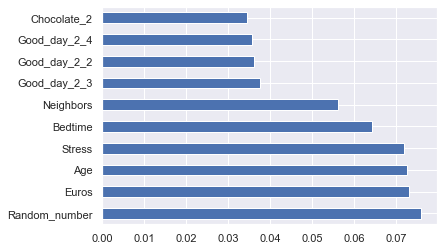

In [118]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(features,target)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [194]:
### Create mode for 10 best features 
df_improved = df_binary.copy()

In [212]:
# Set response and explanatory variables
features = df_improved[['Chocolate_2', 'Good_day_2_4', 'Good_day_2_2', 'Good_day_2_3', 'Neighbors', 'Bedtime', 'Stress', 'Age', 'Euros', 'Random_number']]
target = df_improved["Program"]

In [213]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123) # 70% training and 30% test

In [214]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=8)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)


In [215]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6851851851851852
